In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# Распределение Парето

### Известно, что распределение Парето - это распределение размера файла в интернет-трафике по TCP-протоколу.

Сгенерируем выборку объёма 1000 (как и указано в условии)

In [2]:
pareto_rv = sts.pareto(math.e) # Будем использовать число e

In [3]:
sample = pareto_rv.rvs(1000) # Генерация выборки размера 1000

In [4]:
x = np.linspace(0, 5, 1000)
pdf = pareto_rv.pdf(x) # Случайная величина Парето

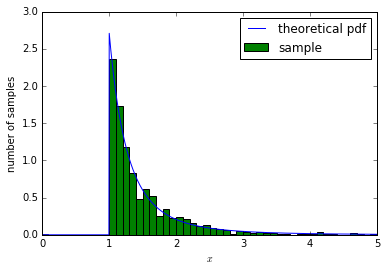

In [5]:
plt.plot(x, pdf, label='theoretical pdf') # Теоретическая плотность распределения случайной величины
plt.hist(sample, 50, range=(0, 5), normed=True, label='sample') # Гистограмма выборки

plt.ylabel('number of samples') # Названия осей
plt.xlabel('$x$')

plt.legend(loc='upper right') # Расположение легенды

# Задача — оценить распределение выборочного среднего случайной величины при разных объёмах выборок.

## Среднее и дисперсия распределения Парето вычисляется по формулам:

$$\mathbb {E} [X]={\frac {kx_{m}}{k-1}}, 
\mathbb {D} [X]=\left({\frac {x_{m}}{k-1}}\right)^{2}{\frac {k}{k-2}}, $$ где в данном случае$$ {x_{m}} = 1, {k} = {e} $$

### Таким образом, имеем:
$$\mathbb {E} [X]={\frac {e}{e-1}}, 
\mathbb {D} [X]=\left({\frac {1}{e-1}}\right)^{2}{\frac {e}{e-2}} $$

### Тогда согласно центральной предельной теореме получим:

$$\mathbb {E} [\bar{X}]={\frac {e}{e-1}}, 
\mathbb {D} [\bar{X}]={\frac {1}{n}}\left({\frac {1}{e-1}}\right)^{2}{\frac {e}{e-2}} $$

\- это среднее и дисперсия нормального распределения приближающего распределение выборочных средних

### Генерация выборок при n = 30

In [6]:
means = [] # Средние случайной величины при объёме выборки 30
for i in range(1000):
    means.append((pareto_rv.rvs(30)).mean())
    
mu = math.e / (math.e - 1) # Параметры приближающего нормального распределения
sigma = ((1 / (math.e - 1)) ** 2 * math.e / (math.e - 2) / 30) ** 0.5

norm_rv = sts.norm(loc=mu, scale=sigma) # Зададим нормально распределенную случайную величину
vals = np.linspace(1, 3, 100) # Сгенерируем 100 значений
pdf = norm_rv.pdf(vals) # Плотность соответствующего нормального распределения

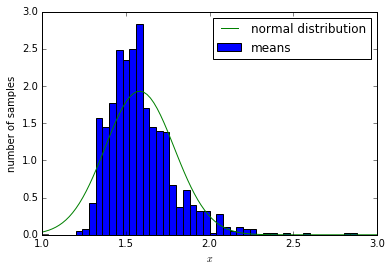

In [7]:
plt.hist(means, 50, range=(1, 3), normed=True, label='means') # Гистограмма средних
plt.plot(vals, pdf, label='normal distribution') # Плотность нормального распределения

plt.ylabel('number of samples') # Названия осей
plt.xlabel('$x$')

plt.legend(loc='upper right') # Расположение легенды

### Генерация выборок при n = 50

In [8]:
means = [] # Средние случайной величины при объёме выборки 50
for i in range(1000):
    means.append((pareto_rv.rvs(50)).mean())
    
mu = math.e / (math.e - 1) # Параметры приближающего нормального распределения
sigma = ((1 / (math.e - 1)) ** 2 * math.e / (math.e - 2) / 50) ** 0.5

norm_rv = sts.norm(loc=mu, scale=sigma) # Зададим нормально распределенную случайную величину
vals = np.linspace(1, 3, 100) # Сгенерируем 100 значений
pdf = norm_rv.pdf(vals) # Плотность соответствующего нормального распределения

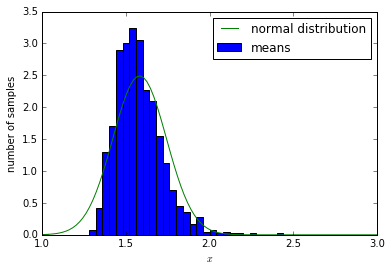

In [9]:
plt.hist(means, 50, range=(1, 3), normed=True, label='means') # Гистограмма средних
plt.plot(vals, pdf, label='normal distribution') # Плотность нормального распределения

plt.ylabel('number of samples') # Названия осей
plt.xlabel('$x$')

plt.legend(loc='upper right') # Расположение легенды

### Генерация выборок при n = 100

In [10]:
means = [] # Средние случайной величины при объёме выборки 100
for i in range(1000):
    means.append((pareto_rv.rvs(100)).mean())
    
mu = math.e / (math.e - 1) # Параметры приближающего нормального распределения
sigma = ((1 / (math.e - 1)) ** 2 * math.e / (math.e - 2) / 100) ** 0.5

norm_rv = sts.norm(loc=mu, scale=sigma) # Зададим нормально распределенную случайную величину
vals = np.linspace(1, 3, 100) # Сгенерируем 100 значений
pdf = norm_rv.pdf(vals) # Плотность соответствующего нормального распределения

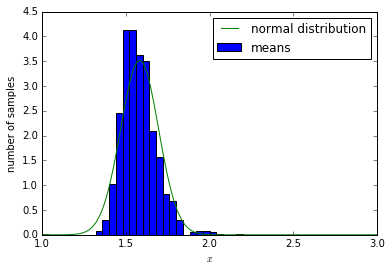

In [11]:
plt.hist(means, 50, range=(1, 3), normed=True, label='means') # Гистограмма средних
plt.plot(vals, pdf, label='normal distribution') # Плотность нормального распределения

plt.ylabel('number of samples') # Названия осей
plt.xlabel('$x$')

plt.legend(loc='upper right') # Расположение легенды

## Вывод: мы наблюдаем, как с ростом объёма выборки нормальное распределение вытягивается вверх, становится похоже на узкую шляпу.
## Кроме того, заметно то,  что с ростом объёма выборки нормальное распределение всё лучше и лучше апроксимирует распределение выборочных средних.